In [60]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [85]:
# jupyter notebook specific commands
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]

In [62]:
directory = '../csvs/'
os.chdir(directory)
files = os.listdir(directory)

In [63]:
chans = []
snrs = []
# snrs = np.zeros(len(files))
for i, file in enumerate(files):
    fn = file[:-4]
    fn = fn.rsplit('_', 1)
    chans.append(fn[0])
    snrs.append(fn[1])
    
chans = np.unique(chans).tolist()
snrs = np.unique(snrs).tolist()

In [64]:
iterables = [chans, snrs]
index = pd.MultiIndex.from_product(iterables, names=['ch', 'snr'])

In [65]:
df = pd.DataFrame()
for file in files:
    tmp = pd.DataFrame()
    fn = file[:-4]
    chan, snr = fn.rsplit('_', 1)
    tmp = pd.read_csv(f'{directory}{file}')


    tmp['chan'] = chan
    tmp['snr'] = float(snr)
    df = df.append(tmp, ignore_index=True)

In [66]:
df

,epoch,acc,loss,val_acc,val_loss,chan,snr
0,0,0.475000,1.272243,0.563636,0.897312,mu,2.0
1,1,0.599886,0.870556,0.673182,0.785309,mu,2.0
2,2,0.661818,0.748685,0.577273,0.871147,mu,2.0
3,3,0.710795,0.647125,0.722273,0.647309,mu,2.0
4,4,0.751364,0.555915,0.745000,0.563053,mu,2.0
...,...,...,...,...,...,...,...
1995,20,0.890455,0.233686,0.816364,0.450548,mu,4.0
1996,21,0.889886,0.238540,0.800909,0.475709,mu,4.0
1997,22,0.896932,0.215012,0.812273,0.498817,mu,4.0
1998,23,0.904886,0.210546,0.829091,0.465983,mu,4.0


,epoch,acc,loss,val_acc,val_loss,chan,snr
0,0,0.475000,1.272243,0.563636,0.897312,mu,2.0
1,1,0.599886,0.870556,0.673182,0.785309,mu,2.0
2,2,0.661818,0.748685,0.577273,0.871147,mu,2.0
3,3,0.710795,0.647125,0.722273,0.647309,mu,2.0
4,4,0.751364,0.555915,0.745000,0.563053,mu,2.0
...,...,...,...,...,...,...,...
1995,20,0.890455,0.233686,0.816364,0.450548,mu,4.0
1996,21,0.889886,0.238540,0.800909,0.475709,mu,4.0
1997,22,0.896932,0.215012,0.812273,0.498817,mu,4.0
1998,23,0.904886,0.210546,0.829091,0.465983,mu,4.0


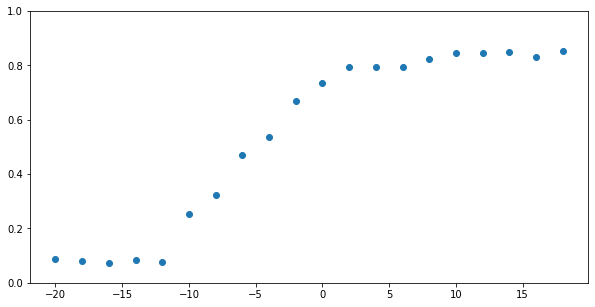

In [71]:
mu = df.loc[df['chan'] == 'mu']
smu = mu.loc[mu['epoch'] == 24]
plt.scatter(smu['snr'], smu['val_acc'])
plt.ylim([0,1])
plt.show()

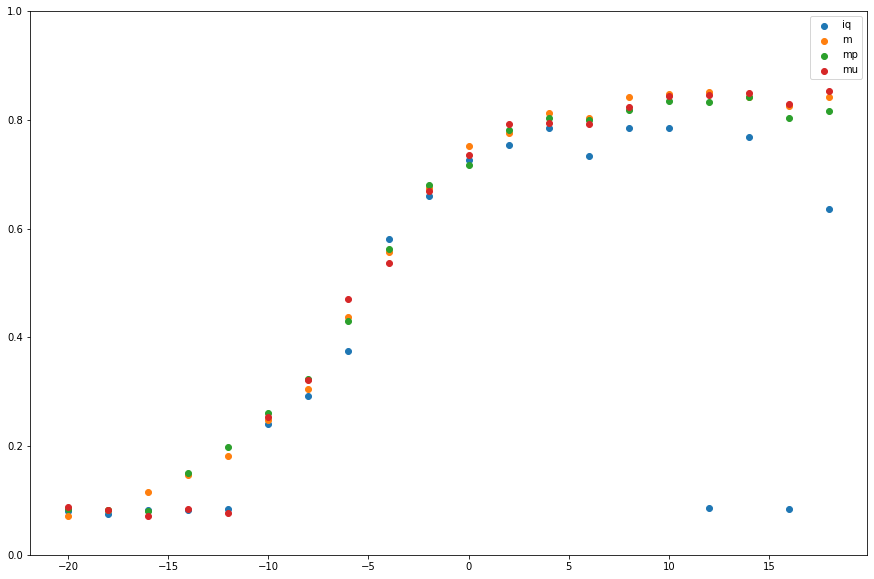

In [86]:
for chan in chans:
    ch = df.loc[df['chan'] == chan]
    ep = ch.loc[ch['epoch'] == 24]
    plt.scatter(ep['snr'], ep['val_acc'], label=chan)
    
plt.legend()    
plt.ylim([0, 1])
plt.show()    